<a href="https://colab.research.google.com/github/ykitaguchi77/YOLOv5/blob/main/YOLOv5_interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLOv5 interference**

In [1]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # or yolov5n - yolov5x6, custom

# Images
img = ['https://ultralytics.com/images/zidane.jpg']  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
#results.show()

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 914.3ms pre-process, 365.9ms inference, 17.6ms NMS per image at shape (1, 3, 384, 640)


## Pandasに出力

In [16]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,742.974792,48.395691,1141.844604,720.000000,0.881052,0,person
1,442.007660,437.522400,496.653961,709.973572,0.675214,27,tie
2,123.024200,193.287354,715.662231,719.723877,0.665813,0,person
3,982.803162,308.417358,1027.365845,419.987000,0.260076,27,tie


In [3]:
results.pandas().xyxy[0].confidence

0    0.881052
1    0.675214
2    0.665813
3    0.260076
Name: confidence, dtype: float64

## 画像をcrop

In [ ]:
results.crop()[0]['im']

Saved 1 image to runs/detect/exp17
Saved results to runs/detect/exp17



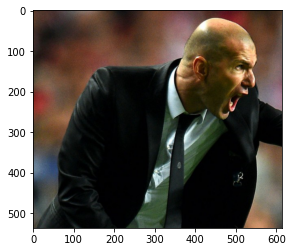

In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

cropped_image = results.crop()[1]['im']
cropped_image = cropped_image[:,:,::-1] #BGR to RGB https://qiita.com/ikanamazu/items/3e6337fa2c477992ee8d
#貼り付け
plt.imshow(cropped_image)
#表示
plt.show()

## 座標で出力

In [28]:
results.xyxy[0] #左上x, 左上y, 右下x, 右下y, confidence, 

tensor([[7.42975e+02, 4.83957e+01, 1.14184e+03, 7.20000e+02, 8.81052e-01, 0.00000e+00],
        [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
        [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65813e-01, 0.00000e+00],
        [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])

In [ ]:
#確率が最大になるものを抜き出す
output = results.xyxy[0] #左上x, 左上y, 右下x, 右下y, confidence, 
maxconf_idx = torch.argmax(output, dim=0)[5] #confidenceが最大になる行番号
print(output[maxconf_idx]) #confidenceが最大になる行番号を抜き出す

In [ ]:
import os
!git clone https://github.com/ultralytics/yolov5  # clone
os.chdir("/content/yolov5")
!pip install -r requirements.txt  # install

In [ ]:
!python detect.py --source https://ultralytics.com/images/zidane.jpg